<!--# STAT 207: Data Science Exploration-->

# <u>Case Study 9 Notebook</u>: Inference for $\mu_1-\mu_2$ and $p_1-p_2$

This Case Study contains analyses to answer the following two questions:

- Lead Poisoning and Childhood IQ Analysis: Is there an association between childhood lead exposure and IQ?
- Political Affiliation and Approval of the Direction the Country is Going in Analysis: Is there an association between political party and approval for the direction the country is going in (in 2017)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Review of the t distribution

Let's begin by exploring features of the t-distribution that we introduced in Case Studies 7 & 8.

Calculate the probability that a t-score (that is an observation from the t-distribution with 20 degrees of freedom) is greater than 1.96. 

$P(T_{20}>1.96) = 0.032$

In [2]:
from scipy.stats import t

1-t.cdf(1.96, df=20)

0.03203912650178853

Calculate the t-score that creates a right tail area of 0.025 under the t-distribution with 20 degrees of freedom.

What is the value of $t$ in which $P(T_{20}>t)=0.025$?

Answer: $t=2.086$.

In [3]:
t.ppf(0.975, df=20)

2.085963447265837

Suppose we know that the average GPA of ALL UIUC students is 3.3. We then randomly select 20 UIUC students and find that they have a sample mean GPA of 3.5 and a standard deviation of 0.3. Suppose that the distribution of all UIUC student GPAs is approximately normal. Calculate the probability (the most accurate one) of randomly selecting a sample mean that is greater than or equal to the sample mean that we collected.

<u>Givens</u>:
* $\mu=3.3$
* $n=20$
* $\bar{x}=3.5$
* $s=0.3$
* $X\sim N(mean=\mu=3.3, std=\sigma=?)$


<u>Shape of the Sampling Distribution</u>:
We know that the sampling distrbution (of sample means) is normal

$\bar{X}\sim N(mean=\mu=3.3, std=\frac{\sigma}{\sqrt{n}}=?)$ because the Central Limit Theorem conditions (for sample means) below hold:
1. the sample is randomly collected
2. $n=20<10$% of all UIUC population
3. <s>n=20>30</s> OR the population distribution is normal (assumption can be assessed with the sample distribution, if needed).

<u>Finding the Probability</u>:

Because $\bar{X}$ is normal, then the following holds:

$P(\bar{X}\geq 3.5)\approx P(T_{n-1}\geq \frac{3.5-\mu}{\frac{s}{\sqrt{n}}})=P(T_{19}\geq \frac{3.5-3.3}{\frac{0.3}{\sqrt{20}}})=P(T_{19}\geq 2.98)=0.0038$

In [4]:
tscore=(3.5-3.3)/(0.3/np.sqrt(20))
tscore

2.9814239699997227

In [5]:
1-t.cdf(2.98, df=19)

0.003847401121239824

<hr>

## Frequentist Confidence Intervals for a Difference of Population Means (μ_1-μ_2)

**<u>Case Study</u> Lead Poisoning and Childhood IQ Analysis: Is there an association between childhood lead exposure and IQ *in all children*?**

To assess this question, we will answer: What is a plausible range of values for $\mu_{lo}-\mu_{hi}$,  the difference in the average IQ score of children with low level lead exposure and the average IQ score of children with high level lead exposure?

### Preparing the Data and Summary Analyses

In [6]:
df = pd.read_csv('lead.csv')[['group', 'fulliq']]

In [7]:
df.head()

,group,fulliq
0,lead < 40,70
1,lead < 40,85
2,lead < 40,86
3,lead < 40,76
4,lead < 40,84


Next, let's create two subsets of this dataframe to create our two separate low and high exposure level samples.

In [8]:
# Extract the two subgroups from the data
low = df['fulliq'][df['group']=='lead < 40']
high = df['fulliq'][df['group']=='lead >= 40']

In [9]:
low.head()

0    70
1    85
2    86
3    76
4    84
Name: fulliq, dtype: int64

In [10]:
high.head()

63    82
64    93
65    85
66    75
67    85
Name: fulliq, dtype: int64

Next, we can collect the sample means, sample standard deviations, and sample sizes.

In [11]:
n_lo=len(low)
mean_lo=low.mean()
std_lo=low.std()

print('Sample Size of Low Exposure Children:', n_lo)
print('Sample Mean of Low Exposure Children:', mean_lo)
print('Sample Standard Deviation of Low Exposure Children:', std_lo)

Sample Size of Low Exposure Children: 78
Sample Mean of Low Exposure Children: 92.88461538461539
Sample Standard Deviation of Low Exposure Children: 15.344511916449022


In [12]:
n_hi=len(high)
mean_hi=high.mean()
std_hi=high.std()

print('Sample Size of High Exposure Children:', n_hi)
print('Sample Mean of High Exposure Children:', mean_hi)
print('Sample Standard Deviation of High Exposure Children:', std_hi)

Sample Size of High Exposure Children: 46
Sample Mean of High Exposure Children: 88.02173913043478
Sample Standard Deviation of High Exposure Children: 12.206535827507023


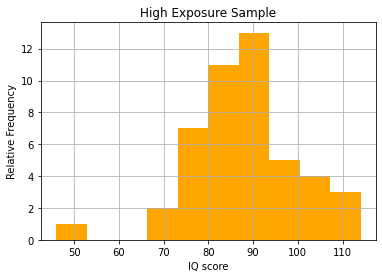

In [13]:
high.hist(color='orange')
plt.title('High Exposure Sample')
plt.xlabel('IQ score')
plt.ylabel('Relative Frequency')
plt.show()

This sample distribution is not normal (not unimodal and symmetric).

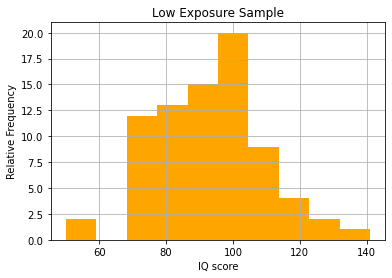

In [14]:
low.hist(color='orange')
plt.title('Low Exposure Sample')
plt.xlabel('IQ score')
plt.ylabel('Relative Frequency')
plt.show()

This sample distribution is also not normal (not unimodal and symmetric).

### Assumptions

Next, let's check the Central Limit Theorem conditions (for differences of sample means) to see if we can make valid interpretations and inferences with our confidence interval

1. Sample with low lead exposures children is randomly sampled.
2. $n_{lo}=78<10$% of all children who have had low levels of lead exposure.
3. Sample with high lead exposures children is randomly sampled.
4. $n_{hi}=46<10$% of all children who have had high levels of lead exposure.
5. $n_{hi}=78>30$ OR <s>the population (or sample) distribution of low lead level exposure children IQ scores is approximately normal.</s>
5. $n_{lo}=46>30$ OR <s>the population (or sample) distribution of high lead level exposure children IQ scores is approximately normal.</s>
6. We can assume that there is no pairwise relationship between the children in both groups in this sample.

All of the conditions are met, so we can proceed with creating a confidence interval.

### 95% Confidence Interval Calculation for $\mu_{lo}-\mu_{hi}$

We don't know $\sigma_{lo}$ and $\sigma_{hi}$, so we will use the the **t-distribution** to create our critical value in this case.

Specifically we will use a t-score from the t-distribution with $df=min\{n_{lo}-1,n_{hi}-1\} =min\{78-1,46-1\}=45$.

We want this to be the positive t-score $t^*_{45}$ in this distribution that creates an area of 0.95 between $-t^*_{45}$ and $t^*_{45}$.

This will provide a conservative confidence interval.

In [15]:
critical_value=t.ppf(0.975, df=45)
print('Critical Value: ',critical_value)

Critical Value:  2.0141033848332923


In [16]:
point_estimate=mean_lo-mean_hi
print('Point Estimate: ', point_estimate)

Point Estimate:  4.862876254180605


In [17]:
standard_error=np.sqrt((std_lo**2)/n_lo + (std_hi**2)/n_hi)
print('Standard Error: ', standard_error)

Standard Error:  2.501551827882583


In [18]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('95% Confidence Interval:', lower_bound,upper_bound)

95% Confidence Interval: -0.17550774969361438 9.901260258054826


### Confidence Interval Interpretation

We are 95% confident that the population mean IQ for all children with low level lead exposure and the population mean IQ for all children with high level lead exposure ($\mu_{lo}-\mu_{hi}$) is contained by -0.1755 and 9.901.

In other words, we are 95% confident that the population mean IQ for all children with low level lead exposure is between -0.1755 and 9.901 higher than the population mean IQ for all children with high level lead exposure.

## Conducting Hypothesis Testing about $\mu_1-\mu_2\neq 0$

We would now like to test that claim that **there is an association between lead exposure and childhood IQ score**, which can be represented as the claim $\mu_{lo}-\mu_{hi}\neq 0$.

### Hypotheses

To test this claim we can first formulate our null and alternative hypotheses.

$H_0: \mu_{lo}-\mu_{hi}= 0$

$H_A: \mu_{lo}-\mu_{hi}\neq 0$

### Assumptions

We can check the same assumptions for the CLT for each of our two sampling distributions.  These are the same assumptions used for the confidence interval above.

1. Sample with low lead exposures children is randomly sampled.
2. $n_{lo}=78<10$% of all children who have had low levels of lead exposure.
3. Sample with high lead exposures children is randomly sampled.
4. $n_{hi}=46<10$% of all children who have had high levels of lead exposure.
5. $n_{hi}=78>30$ OR <s>the population (or sample) distribution of low lead level exposure children IQ scores is approximately normal.</s>
5. $n_{lo}=46>30$ OR <s>the population (or sample) distribution of high lead level exposure children IQ scores is approximately normal.</s>
6. We can assume that there is no pairwise relationship between the children in both groups in this sample.


All of the conditions are met, so we can proceed with conducting this hypothesis test.

### Calculate the *p*-value

We don't know $\sigma_{lo}$ and $\sigma_{hi}$, so we will calculate the t-score of our point estimate ($\bar{x}_{lo}-\bar{x}_{hi}$) and use the **t-distribution**  $df=min\{n_{lo}-1,n_{hi}-1\} =min\{78-1,46-1\}=45$ to calculate our p-value probability.


$p-value=2P(T_{45}\geq |\frac{(\bar{x}_{lo}-\bar{x}_{hi}) - (\mu_{lo} - \mu_{hi})}{    \sqrt{\frac{s^2_{lo}}{n_{lo}}  +\frac{s^2_{hi}}{n_{hi}} }           } |)=2P(T_{45}\geq |\frac{(\bar{x}_{lo}-\bar{x}_{hi}) - (0)}{    \sqrt{\frac{s^2_{lo}}{n_{lo}}  +\frac{s^2_{hi}}{n_{hi}} }           } |)   =2P(T_{45}\geq |\frac{(92.88-88.02) - (0)}{    \sqrt{\frac{15.34^2}{78}  +\frac{12.21^2}{46} }           } |) =2P(T_{45}\geq 1.944)$

In [19]:
test_stat=(point_estimate-0)/standard_error
print('Test statistic (ie. t-score of the point estimate):',test_stat)

Test statistic (ie. t-score of the point estimate): 1.9439438351740028


In [20]:
pvalue=2*(1-t.cdf(np.abs(test_stat), df=45))

print('p-value: ',pvalue)

p-value:  0.05817070511445488


### Make a Conclusion with our p-value, using a significance level of $\alpha=0.05$.

Because $p-value=0.058\geq \alpha=0.05$, we fail to reject the null hypothesis. Thus, we do not have sufficient evidence to suggest that $\mu_{lo}-\mu_{hi}\neq 0$ (that the population means of IQ levels for all children with low level lead exposure and for all children with high level lead exposure are different, or that there is an association between lead exposure and childhood IQ score).

### Perform Hypothesis Testing with our earlier 95% Confidence Interval

Let's also use our 95% confidence interval calculated earlier to make an inference for this hypothesis testing framework.

Because the null value (0) in our hypotheses is inside our 95% confidence interval (-0.176,9.901), we fail to reject the null hypothesis. Thus, we do not have sufficient evidence to suggest that $\mu_{lo}-\mu_{hi}\neq 0$ (or that there is an association between lead exposure and childhood IQ score).

<hr>

## Inference on a Difference of Population Proportions ($p_1-p_2$)

**<u>Case Study</u> Political Affiliation and Approval of the Direction the Country is Going In: We would like to know if there is an association between political affiliation and opinion on the direction that the country is going in *for all adults living in the U.S.*?**

Another way of asking this would be to test the claim $p_{dem}-p_{rep}\neq 0$ in which:

* $p_{dem}=$ proportion of all democrats living in the U.S. that approve of the direction the country is going in
* $p_{rep}=$ proportion of all republicans living in the U.S. that approve of the direction the country is going in

### Preparing the Data

First let's read in the 2017 Pew dataset which contains a random sample of democrats and their opinions on this question and a random sample of republicans and their opinion on this question.

In [21]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]

dfpew = pd.read_csv('Feb17public.csv', na_values=missing_values)
dfpew[['q2','party']].head(10)

,q2,party
0,Dissatisfied,Independent
1,Dissatisfied,Democrat
2,Dissatisfied,Independent
3,Satisfied,Republican
4,Dissatisfied,Democrat
5,Dissatisfied,Democrat
6,Satisfied,Independent
7,Dissatisfied,Republican
8,Satisfied,Independent
9,Dissatisfied,Independent


Here is how the results breakdown by party affiliation:

In [22]:
pd.crosstab(dfpew['party'], dfpew['q2'])

q2,Dissatisfied,Satisfied
party,,
Democrat,444,68
Independent,360,153
No preference (VOL.),21,14
Other party (VOL.),4,1
Republican,157,192


### Summary Analyses

We can start by calculating the sample proportions and the sample sizes.

We don't need fancy statistics to see that there was an enormous difference between Democrats and Republicans on this issue. Their respective rates of satisfaction of the way things are going in 2017 were:

In [23]:
# Extract q1 responses for democrats and republicans
dem = dfpew['q2'][dfpew['party']=='Democrat']
rep = dfpew['q2'][dfpew['party']=='Republican']

In [24]:
# calculate approval proportions
p_dem = sum(dem=='Satisfied')/dem.shape[0] 
p_rep = sum(rep=='Satisfied')/rep.shape[0]

In [25]:
# display results
print('Democrats:  approval rate =', round(p_dem, 3))
print('Republicans:  approval rate =', round(p_rep, 3))

Democrats:  approval rate = 0.128
Republicans:  approval rate = 0.516


In [26]:
n_dem=dem.shape[0] 
n_rep=rep.shape[0]

In [27]:
print('Democrats:  sample size =', n_dem)
print('Republicans:  sample size =', n_rep)

Democrats:  sample size = 530
Republicans:  sample size = 372


In [28]:
p_common = (sum(dem=='Satisfied') + sum(rep=='Satisfied'))/(dem.shape[0] + rep.shape[0])
print('Common: approval rate =', round(p_common, 3))

Common: approval rate = 0.288


### Assumptions

Next, let's check the Central Limit Theorem conditions (for differences of sample proportion).

Note: Because we do not know $p_1$ and $p_2$ we will assume the null hypothesis is true and plug in the corresponding sample proprotion in these conditions.  The common sample proportion is $\hat{p} = \frac{X_1 + X_2}{n_1 + n_2}$

1. $n_1p_1\approx n_1\hat{p}=530(.288)=\geq 10$ and $n_1(1-p_1)\approx n_1(1-\hat{p})=530(1-.288)=\geq 10$
2. $n_2p_2\approx n_2\hat{p}=372(.288)=\geq 10$ and $n_2(1-p_2)\approx n_2(1-\hat{p})=372(1-.288)=\geq 10$
3. Sample of democrats is randomly selected and $n_{dem}=530<10$% of all democrats living in the U.S.
4. Sample of republicans is randomly selected and $n_{rep}=372<10$% of all republicans living in the U.S.
5. Sample of democrats is independent of sample of republicans.


All of the conditions hold, so we can proceed with conducting hypothesis testing and creating a confidence interval for $p_{dem}-p_{rep}$.

### Calculate the *p*-value

Note: Because we do not know $p_1$ and $p_2$ we will plug in the corresponding common proportion instead ($\hat{p}$) JUST IN THE STANDARD ERROR.

$p-value=2P(Z\geq |\frac{(\hat{p}_{dem} -\hat{p}_{rep}) -(p_{dem}-p_{rep})    }{   \sqrt{   \frac{p_{dem}(1-p_{dem})}{n_{dem}}   + \frac{p_{rep}(1-p_{rep})}{n_{rep}}                 }                         }|)$

$=2P(Z\geq |\frac{(\hat{p}_{dem} -\hat{p}_{rep}    ) -(0)}{   \sqrt{   \frac{\hat{p}(1-\hat{p})}{n_{dem}}   + \frac{\hat{p} (1-\hat{p} )}{n_{rep}}                 }                         }|)$

$=2P(Z\geq |\frac{(.128 -.516    ) -(0)}{   \sqrt{   \frac{.288(1-.288)}{530}   + \frac{.288 (1-.288 )}{372}                 }                         }|)$

$=2P(Z\geq 12.659)$

$\approx 0$.

In [29]:
point_estimate=p_dem-p_rep
print('Point Estimate:', point_estimate)

Point Estimate: -0.3878271454656117


In [30]:
standard_error = np.sqrt(p_common*(1-p_common)/n_dem + p_common*(1-p_common)/n_rep)
print('Standard Error:', standard_error)

Standard Error: 0.0306366668870057


In [31]:
test_statistic=(point_estimate-0)/standard_error
print('Test Statistic (ie. the z-score of the point estimate):', test_statistic)

Test Statistic (ie. the z-score of the point estimate): -12.658920988239275


In [32]:
from scipy.stats import norm
pvalue=2*(1-norm.cdf(np.abs(test_statistic)))

print('p-value:', pvalue)

p-value: 0.0


### Evaluate your *p*-value using a significance level of $\alpha=0.10$

Because $p-value\approx 0<\alpha=0.10$, we reject the null hypothesis. Thus we do have sufficient evidence to suggest that $p_{dem}-p_{rep}\neq 0$ (or in other words there is an association between political party and approval for the direction that the country is going in in 2017 for all adults living in the U.S.)

## Confidence Interval for $p_{dem}-p_{rep}$

Generate a 90% confidence interval for $p_{dem}-p_{rep}$.

### Assumptions

First we need to check the Central Limit theorem conditions (for a difference of sample proportions).

Note: Because we do not know $p_1$ and $p_2$ (and no longer have any underlying assumptions about their relationship) we will plug in the corresponding sample proprotions in instead ($\hat{p}_1$ and $\hat{p}_2$) in these conditions as well as for the standard error.

1. $n_1p_1\approx n_1\hat{p}_1=530(.128)=\geq 10$ and $n_1(1-p_1)\approx n_1(1-\hat{p}_1)=530(1-.128)=\geq 10$
2. $n_2p_2\approx n_2\hat{p}_2=372(.516)=\geq 10$ and $n_2(1-p_2)\approx n_2(1-\hat{p}_2)=372(1-.516)=\geq 10$
3. Sample of democrats is randomly selected and $n_{dem}=530<10$% of all democrats living in the U.S.
4. Sample of republicans is randomly selected and $n_{rep}=372<10$% of all republicans living in the U.S.
5. Sample of democrats is independent of sample of republicans.


All of the conditions hold, so we can proceed with conducting hypothesis testing and creating a confidence interval for $p_{dem}-p_{rep}$.

### Confidence Interval Calculation

The critical value for this 90% confidence interval is the positive z-score $z^*$ that creates an area of 0.90 between $-z^*$ and $z^*$ under the standard normal distribution.

In [33]:
critical_value=norm.ppf(0.95)
print('Critical Value:', critical_value)

Critical Value: 1.6448536269514722


In [34]:
point_estimate=p_dem-p_rep
print('Point Estimate:', point_estimate)

Point Estimate: -0.3878271454656117


In [35]:
standard_error = np.sqrt(p_dem*(1-p_dem)/n_dem + p_rep*(1-p_rep)/n_rep)
print('Standard Error:', standard_error)

Standard Error: 0.029704604517991694


In [36]:
lower_bound=point_estimate-critical_value*standard_error
upper_bound=point_estimate+critical_value*standard_error

print('90% Confidence Interval:', lower_bound,upper_bound)

90% Confidence Interval: -0.4366868719441894 -0.338967418987034


### Relationship with Hypothesis Testing

Use this 90% confidence interval to make a conclusion about your null and alternative hypotheses.

Because the null value (0) for these hypothesis is not in the confidence interval range, we reject the null hypothesis. Thus we do have sufficient evidence to suggest that $p_{dem}-p_{rep}\neq 0$ (or in other words there is an association between political party and approval for the direction that the country is going in in 2017 for all adults living in the U.S.)

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign